### **``Exploration Notebook``** 
``Equity Impact on Employee Attrition in the Workplace``

``Created by: Mijail Q. Mariano``

``13AUGUST2022``

----

In [47]:
# notebook dependencies
%matplotlib inline
import matplotlib as mlp
mlp.rcParams['figure.dpi'] = 200

# diasbling warning messages
import warnings
warnings.filterwarnings("ignore")

# importing key libraries
import pandas as pd
pd.set_option('display.max_rows', None)
pd.options.display.float_format = '{:.2f}'.format

# numpy import
import numpy as np

# importing acquire module
import acquire

# importing data visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set(style = "darkgrid")

# file cleaning modules
from skimpy import clean_columns

# scipy import
# import scipy.stats as stats
# from math import sqrt

# importing datetime module
# import datetime

# sklearn data science library
# from sklearn.impute import KNNImputer
# from sklearn.impute import MissingIndicator
# from sklearn.experimental import enable_iterative_imputer
# from sklearn.metrics import mean_squared_error
# from sklearn.impute import IterativeImputer
# from sklearn.cluster import KMeans

# from sklearn.preprocessing import RobustScaler, StandardScaler, MinMaxScaler, PolynomialFeatures
# from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
# from sklearn.feature_selection import SelectKBest, RFE, f_regression
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.inspection import permutation_importance

----
#### **``Initial Planning/Ideas``**

Individual Data Science Project:

Mijail Mariano

August 13th 2022

**<u>``1. Formulating the question``</u>**

``This question should be:``

* About social equity or of similar importance (i.e., inequality, racial discrimination, social-mobility, equal opportunity)
* The question is to be freamed in a way that can be quantitatively measured in terms of organizational value & also raises the question around -  “How equal/diverse or fair is an organization's current workplace?”

**target variable: "Attrition"**

**<u>``2. Exploration questions:``</u>**

**``What are you attempting to predict/help to address:``**

``Employee/Company Attrition Rate``

* What is company attrition?
* Why is company attrition important?
* What are the employee attrition demographics?
* Are there pros to attrition? If so, what are these?

**``What specifically are you attempting to investigate/understand:``**

``Equity in the workplace and its impact on attrition``

*Ok, but what specifically?...*

``Do socioeconomic/location factors such as:``

* Where an employee is from/grows-up (County level) impact whether or not they remain with a company?
* The high-school graduation rate
* Incarceration/prison rate
* Fraction of population married by 35 years old
* Poverty rate
* Teenage birth rate

``Are there other questions that may be important to answer?``

How much does an employee's geographical background (where they are from) impact their decision to remain or leave the company?
Are there socioeconomic/employee demographic differences between those employees who leave the company and those who remain? (descriptive/summary statistics)

**<u>``3. Methodology:``</u>**

**``Note:``** 

For this project I am assuming the company's geographical location to be New York City, NY and that employees are only from counties within the three (3) tri-state areas. This includes counties solely from the state's of Connecticut, New Jersey, and New York. To conduct the analysis I will also use a random generator to blindly assign birthplace/locations where employees grew-up and the socioeconomic variables from those locations to statistically explore these variables.

``Where’s the data from?``

To conduct this analysis and potentially generate a predictive company attrition model I combine real socioeconomic and economic data from Harvard’s Opportunity Atlast with an artificially created 2017 IBM Human Resources Kaggle dataset of a small-medium sized company (~1500 records). .

The Opportunity Atlas is a collaborative social equality project through Harvard University, the US Census Bureau, and the US Internal Revenue Service. The initiative’s aim is to track and plot socioeconomic data by exact US states, counties, cities, and neighborhoods in order to understand the childrens’ outcomes and prospect of social mobility. 

*The Atlas is composed of ~21mil Americans born between 1978-1983 who are in their mid-late thirties today. The platform and estimates are based on:

* The 2000 and 2010 Decennial Census short form
* Federal income tax returns for 1989, 1994, 1995, and 1998-2015
* Data from the American Community Survey

<u>Reference Links:</u>
* https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset
* https://www.opportunityatlas.org/

``Why couldn’t you use a real dataset?``

Given the sensitive nature of real employee information, it is relatively difficult to attain similar publicly available data from businesses. Additionally, since it is not common for organizations to collect similar socioeconomic information/drivers that I attempt to investigate - the combination of synthetic and real data seemed like an adequate method for scientific testing.

``So how should I think about this data?``

You can think about this data and the subsequent estimates as a way to understand how geographical/environmental characteristics potentially play a role in employee tenure. Additionally, these estimates help to understand potential employee equity differences in order to address them and successfully retain their employees. 

``Why might these employees decide to leave their company?`` 

(said another way)....
How might these demographic differences contribute to an employee’s decision to stay or leave their company?

Ok, so what happens if employers don’t retain these employees?

**<u>``4. What can employers do to retain these employees?``</u>**

(placeholder for recommendations)


``Opportunity Atlas (Equity DF): features/variables``
1. High_School_Graduation_Rate_rP_gP_pall
2. Household_Income_at_Age_35_rP_gP_pall
3. Incarceration_Rate_rP_gP_pall
4. Fraction_Married_at_Age_35_rP_gP_pall
5. Poverty_Rate_in_2012-16
6. Teenage_Birth_Rate_women_only_rP_gF_pall

``IBM Dataset: features/variables``
1. Age
2. Attrition
3. BusinessTravel
4. DailyRate
5. Department
6. DistanceFromHome
7. Education
8. EducationField
9. EmployeeCount
10. EmployeeNumber
11. EnvironmentSatisfaction
12. Gender
13. HourlyRate
14. JobInvolvement
15. JobLevel
16. JobRole
17. JobSatisfaction
18. MaritalStatus
19. MonthlyIncome
20. MonthlyRate
21. NumCompaniesWorked
22. Over18
23. OverTime
24. PercentSalaryHike
25. PerformanceRating
26. RelationshipSatisfaction
27. StandardHours
28. StockOptionLevel
29. TotalWorkingYears
30. TrainingTimesLastYear
31. WorkLifeBalance
32. YearsAtCompany
33. YearsInCurrentRole
34. YearsSinceLastPromotion
35. YearsWithCurrManager


----

### **``Data Acquisition and Preparation``**

In [48]:
# let's import the IBM employee data first

# ibm_df = pd.read_csv("/Users/mijailmariano/Desktop/IBM_HR-Employee-Attrition.csv")
# print()
# print(f'IBM dataset shape: {ibm_df.shape}')
# ibm_df.head()

In [49]:
# let's import the opportunity atlas data

# equity_df = pd.read_csv("/Users/mijailmariano/Desktop/equity_table.csv")
# print()
# print(f'Equity dataset shape: {equity_df.shape}')
# equity_df.head()

In [50]:
# let's use a random sampler to create 1470 geographical location records
# using Pandas' '.sample()' method wtih parameters 'replace' set to True to allow for duplicate records
# resetting the index number
# setting a random state for reproducibility

# sample_df = equity_df.sample(n = 1470, replace = True, ignore_index = True, random_state = 528)
# sample_df.shape

In [51]:
# let's also reshuffle the ibm df for random assignment & suffling of the dataframe
# resetting the index number (can use unique employee id for predictions/future indexing)
# setting a random state for reproducibility

# ibm_shuffled = ibm_df.sample(n = 1470, replace = False, ignore_index = True, random_state = 528)

# print()
# print(f'dataframe shape: {ibm_shuffled.shape}')
# ibm_shuffled.head() # checks out!

In [52]:
# concatinating the two(2) dataframes

# df = pd.concat([ibm_shuffled, sample_df], axis = 1)

# print()
# print(f'dataframe shape: {df.shape}')
# df.head() # checks out!

In [53]:
# catching the dataframe

# df.to_csv("/Users/mijailmariano/codeup-data-science/drivers_of_workplace_equity/equity_df.csv", index = False)

In [54]:
# importing the dataframe 

df = acquire.get_equity_df()
df.head()

df shape: (1470, 44)


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,YearsWithCurrManager,cty,county_name,state,househouse_income_at_35,high-school_graduation_rate,percentage_married_by_35,incarceration_rate,women_teenage_birthrate,poverty_rate
0,53,No,Travel_Rarely,1223,Research & Development,7,2,Medical,1,1201,...,7,cty36015,Chemung County,NY,44789,0.89,0.49,0.01,0.18,0.16
1,42,No,Travel_Rarely,933,Research & Development,29,3,Life Sciences,1,836,...,8,cty36065,Oneida County,NY,48064,0.90,0.50,0.01,0.12,0.18
2,30,Yes,Travel_Rarely,740,Sales,1,3,Life Sciences,1,1562,...,7,cty09009,New Haven County,CT,50468,0.91,0.45,0.01,0.11,0.13
3,41,No,Travel_Rarely,1411,Research & Development,19,2,Life Sciences,1,334,...,0,cty09009,New Haven County,CT,50468,0.91,0.45,0.01,0.11,0.13
4,34,No,Travel_Rarely,628,Research & Development,8,3,Medical,1,2068,...,2,cty36119,Westchester County,NY,57101,0.92,0.45,0.01,0.09,0.10


In [55]:
# let's check the df info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 44 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Age                          1470 non-null   int64  
 1   Attrition                    1470 non-null   object 
 2   BusinessTravel               1470 non-null   object 
 3   DailyRate                    1470 non-null   int64  
 4   Department                   1470 non-null   object 
 5   DistanceFromHome             1470 non-null   int64  
 6   Education                    1470 non-null   int64  
 7   EducationField               1470 non-null   object 
 8   EmployeeCount                1470 non-null   int64  
 9   EmployeeNumber               1470 non-null   int64  
 10  EnvironmentSatisfaction      1470 non-null   int64  
 11  Gender                       1470 non-null   object 
 12  HourlyRate                   1470 non-null   int64  
 13  JobInvolvement    

In [56]:
# initial summary statistics

summary_stats = df.describe().T
summary_stats["range"] = summary_stats["max"] - summary_stats["min"]
summary_stats

,count,mean,std,min,25%,50%,75%,max,range
Age,1470.00,36.92,9.14,18.00,30.00,36.00,43.00,60.00,42.00
DailyRate,1470.00,802.49,403.51,102.00,465.00,802.00,1157.00,1499.00,1397.00
DistanceFromHome,1470.00,9.19,8.11,1.00,2.00,7.00,14.00,29.00,28.00
Education,1470.00,2.91,1.02,1.00,2.00,3.00,4.00,5.00,4.00
EmployeeCount,1470.00,1.00,0.00,1.00,1.00,1.00,1.00,1.00,0.00
EmployeeNumber,1470.00,1024.87,602.02,1.00,491.25,1020.50,1555.75,2068.00,2067.00
EnvironmentSatisfaction,1470.00,2.72,1.09,1.00,2.00,3.00,4.00,4.00,3.00
HourlyRate,1470.00,65.89,20.33,30.00,48.00,66.00,83.75,100.00,70.00
JobInvolvement,1470.00,2.73,0.71,1.00,2.00,3.00,3.00,4.00,3.00
JobLevel,1470.00,2.06,1.11,1.00,1.00,2.00,3.00,5.00,4.00


In [57]:
# let's normalize the column names

df = clean_columns(df)
df.head()

,age,attrition,business_travel,daily_rate,department,distance_from_home,education,education_field,employee_count,employee_number,...,years_with_curr_manager,cty,county_name,state,househouse_income_at_35,high_school_graduation_rate,percentage_married_by_35,incarceration_rate,women_teenage_birthrate,poverty_rate
0,53,No,Travel_Rarely,1223,Research & Development,7,2,Medical,1,1201,...,7,cty36015,Chemung County,NY,44789,0.89,0.49,0.01,0.18,0.16
1,42,No,Travel_Rarely,933,Research & Development,29,3,Life Sciences,1,836,...,8,cty36065,Oneida County,NY,48064,0.90,0.50,0.01,0.12,0.18
2,30,Yes,Travel_Rarely,740,Sales,1,3,Life Sciences,1,1562,...,7,cty09009,New Haven County,CT,50468,0.91,0.45,0.01,0.11,0.13
3,41,No,Travel_Rarely,1411,Research & Development,19,2,Life Sciences,1,334,...,0,cty09009,New Haven County,CT,50468,0.91,0.45,0.01,0.11,0.13
4,34,No,Travel_Rarely,628,Research & Development,8,3,Medical,1,2068,...,2,cty36119,Westchester County,NY,57101,0.92,0.45,0.01,0.09,0.10


In [58]:
# let's see loop through and inspect columns and unique values

with pd.option_context('display.max_rows', None,):
    for col in df.columns:
        print(f'Column: {col.upper()}')
        print(f'Date type: {df[col].dtype}')
        print(f'Missing values: {df[col].isnull().any()}')
        print(f'Number of unique values: {df[col].nunique()}')
        print(f'Data Sample: {list(df[col].head(10).sort_values())}')
        print('-------------------------------------------------------------------')

Column: AGE
Date type: int64
Missing values: False
Number of unique values: 43
Data Sample: [25, 27, 29, 30, 31, 34, 34, 41, 42, 53]
-------------------------------------------------------------------
Column: ATTRITION
Date type: object
Missing values: False
Number of unique values: 2
Data Sample: ['No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes']
-------------------------------------------------------------------
Column: BUSINESS_TRAVEL
Date type: object
Missing values: False
Number of unique values: 3
Data Sample: ['Travel_Frequently', 'Travel_Frequently', 'Travel_Frequently', 'Travel_Rarely', 'Travel_Rarely', 'Travel_Rarely', 'Travel_Rarely', 'Travel_Rarely', 'Travel_Rarely', 'Travel_Rarely']
-------------------------------------------------------------------
Column: DAILY_RATE
Date type: int64
Missing values: False
Number of unique values: 886
Data Sample: [444, 622, 628, 740, 793, 933, 1031, 1223, 1404, 1411]
-------------------------------------------------------------

<function matplotlib.pyplot.show(close=None, block=None)>

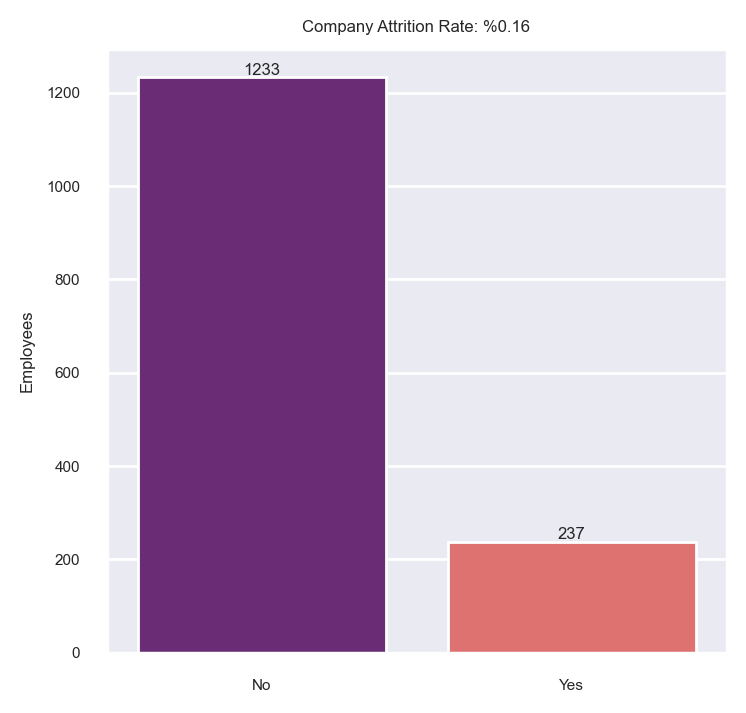

In [95]:
# let's examine the target variable
plt.figure(figsize = (4, 4))
sns.set(font_scale = 0.5)

ax = sns.countplot(df["attrition"], palette="magma")

ax.bar_label(ax.containers[0])
plt.title('Company Attrition Rate: %{:.2f}'.format(len(df[df["attrition"] == "Yes"])/df.shape[0]))
plt.xlabel(None)
plt.ylabel("Employees")
plt.show